In [35]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import copy
from scipy.optimize import minimize, Bounds, NonlinearConstraint


# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 1

#### (a) Use the fact that the Vasicek model possesses an affine term structure to find expressions for:
i) the zero-coupon bond price $P(t,T)$, and

ii) the spot rate as a function of $T$ with $t$ fixed

iii) the forward rate as a function of $T$ with $t$ fixed

#### (b) Write three functions in Python that take as input, the parameters $a$, $b$ and $\sigma$, time to maturity $T$, and the short rate $r$ at present time $t = 0$ and return $p$, $R$ and $f$ respectively

In [2]:
N = 120 # number of months
T = np.array([1/12*i for i in range(0,N+1)]) # time to maturity in years (1 point per month)
M = len(T)
r0, a, b, sigma = 0.05, 1, 0.04, 0.03
p_vasicek = fid.zcb_price_vasicek(r0,a,b,sigma,T)
R_vasicek = fid.spot_rate_vasicek(r0,a,b,sigma,T)
f_vasicek = fid.forward_rate_vasicek(r0,a,b,sigma,T)

#### (c) Use the functions you have written above to plot the term structures of zero coupon bond prices, the term structure of spot rates and the term structure of instantaneous forward rates for maturities from 0 to 10 years in a Vasicek model with $a = 1$, $b = 0.04$,$\sigma = 0.03$, $r = 0.05$

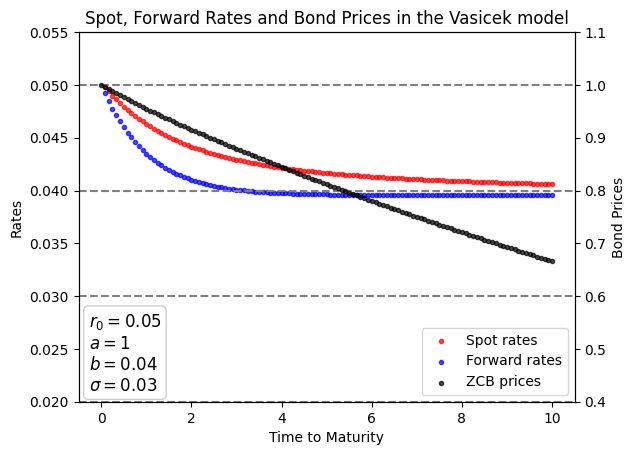

In [3]:
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T[1:], R_vasicek[1:],marker = '.', label='Spot rates', alpha=0.7, color='red')
scatter2 = ax1.scatter(T[1:], f_vasicek[1:], marker = '.', label='Forward rates', alpha=0.7, color='blue')
ax1.set_ylim([0.02, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
for i in range(1, 6):
    ax1.axhline(y=i*0.01, color='gray', linestyle='--')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p_vasicek, label='ZCB prices', marker = '.', color='black', alpha=0.7)
ax2.set_ylim([0.4, 1.1])
ax2.set_ylabel('Bond Prices')

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices in the Vasicek model')
plt.show()
plt.close()

#### (d) Find the stationary mean of the short rate. Is the current level of the short rate below or above the long-run mean? Is your conclusion also reflected in the shape of the spot- and forward rate curves?

The staionary mean is given by $\mu = \frac{b}{a}$ hence it is 0.04. Since the short rate at present time t = 0
is 0.05, the short rate is above it’s stationary mean which results in a downward-sloping yield curve.

# Problem 2

#### (a) In the following, we will compute ZCB prices, spot rates and forward rates in the CIR model by taking a number of steps.

#### (b) Write three functions in Python that take as input, the parameters $a$, $b$ and $\sigma$, time to maturity $T$, and the short rate $r$ at present time $t = 0$ and return $p$, $R$ and $f$ respectively

In [4]:
N = 120 # number of months
T = np.array([1/12*i for i in range(0,N+1)]) # time to maturity in years (1 point per month)
M = len(T)
r0, a, b, sigma = 0.025, 2, 0.05, 0.1
p_cir = fid.zcb_price_cir(r0,a,b,sigma,T)
R_cir = fid.spot_rate_cir(r0,a,b,sigma,T)
f_cir = fid.forward_rate_cir(r0,a,b,sigma,T)

#### (c) Use the functions you have written above to plot the term structures of zero coupon bond prices, the term structure of spot rates and the term structure of instantaneous forward rates for maturities from 0 to 10 years in a CIR model with $a = 2$,$b = 0.05$, $\sigma = 0.1$, $r = 0.025$.

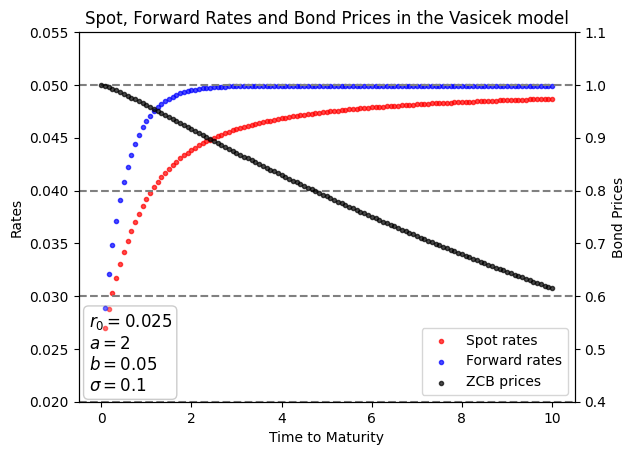

In [5]:
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T[1:], R_cir[1:],marker = '.', label='Spot rates', alpha=0.7, color='red')
scatter2 = ax1.scatter(T[1:], f_cir[1:], marker = '.', label='Forward rates', alpha=0.7, color='blue')
ax1.set_ylim([0.02, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
for i in range(1, 6):
    ax1.axhline(y=i*0.01, color='gray', linestyle='--')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p_cir, label='ZCB prices', marker = '.', color='black', alpha=0.7)
ax2.set_ylim([0.4, 1.1])
ax2.set_ylabel('Bond Prices')

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices in the Vasicek model')
plt.show()
plt.close()

#### (c) Find the stationary mean of the short rate. Is the current level of the short rate below or above the long-run mean? Is your conclusion also reflected in the shape of the spot- and forward rate curves?$

The long-run stationary mean in the CIR model is simply $b = 0.05$, and we see that the short rate at present time $t = 0$ is only $0.025$ well below the stationary mean resulting in an upward-sloping term structure of zero coupon spot rates.

# Problem 3

#### (a) Generate ZCB prices for times to maturity $T = [0,0.1,0.2,...,9.8,9.9,10]$ using an initial value of the short rate of $r = 0.025$ and parameters $a = 2$, $b = 0.1$, $\sigma = 0.02$. Denote these ’empirical’ prices by $p^*(t,T)$.

In [6]:
N = 100 # number of months
T = np.array([1/10*i for i in range(0,N+1)]) # time to maturity in years (10 points per year)
M = len(T)
r0, a, b, sigma = 0.025, 2, 0.1, 0.02
p_star_vasicek= fid.zcb_price_vasicek(r0,a,b,sigma,T)

#### (b) Use the function ’minimize’ and the method ’nelder-mead’ to fit a Vasicek model to the prices $p^*(0,T)$ that you just generated. Do so by minimizing the sum of squared errors as a function of $r$, $a$, $b$, $\sigma$ and setting the starting values of the parameters in the algorithm to $r_0 = 0.03$, $a_0 = 1.8$, ,$b_0= 0.12$ $\sigma_0 = 0.03$. Plot the fitted values $\hat{p}(0,T)$ and the empirical values $p^*(0,T)$. Are the fitted and empirical values close? Also plot the residuals of your fit and find the mean squared error

In [7]:
# create a fitting function
def vasicek_zcb_obj(param,p_star,T):
    r0, a, b, sigma = param
    N = len(p_star)
    p_fit = fid.zcb_price_vasicek(r0,a,b,sigma,T)
    y = 0
    for i in range(0,N):
        y += 1e16*(p_fit[i] - p_star[i])**2
    return y

In [8]:
params0 = (0.03, 1.8, 0.12, 0.03)
result = minimize(vasicek_zcb_obj,params0,method = 'nelder-mead',args = (p_star_vasicek,T),options={'xatol': 1e-8,'disp': False})
r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.x
print("results:\n",
      f"r0_hat:     {r0_hat:5f} (true: {r0})\n", 
      f"a_hat:      {a_hat:5f} (true: {a})\n", 
      f"b_hat:      {b_hat:5f} (true: {b})\n", 
      f"sigma_hat:  {sigma_hat:5f} (true: {sigma})\n")
p_fit = fid.zcb_price_vasicek(r0_hat,a_hat,b_hat,sigma_hat,T)
res = p_star_vasicek - p_fit

results:
 r0_hat:     0.024991 (true: 0.025)
 a_hat:      1.998770 (true: 2)
 b_hat:      0.100032 (true: 0.1)
 sigma_hat:  0.027786 (true: 0.02)



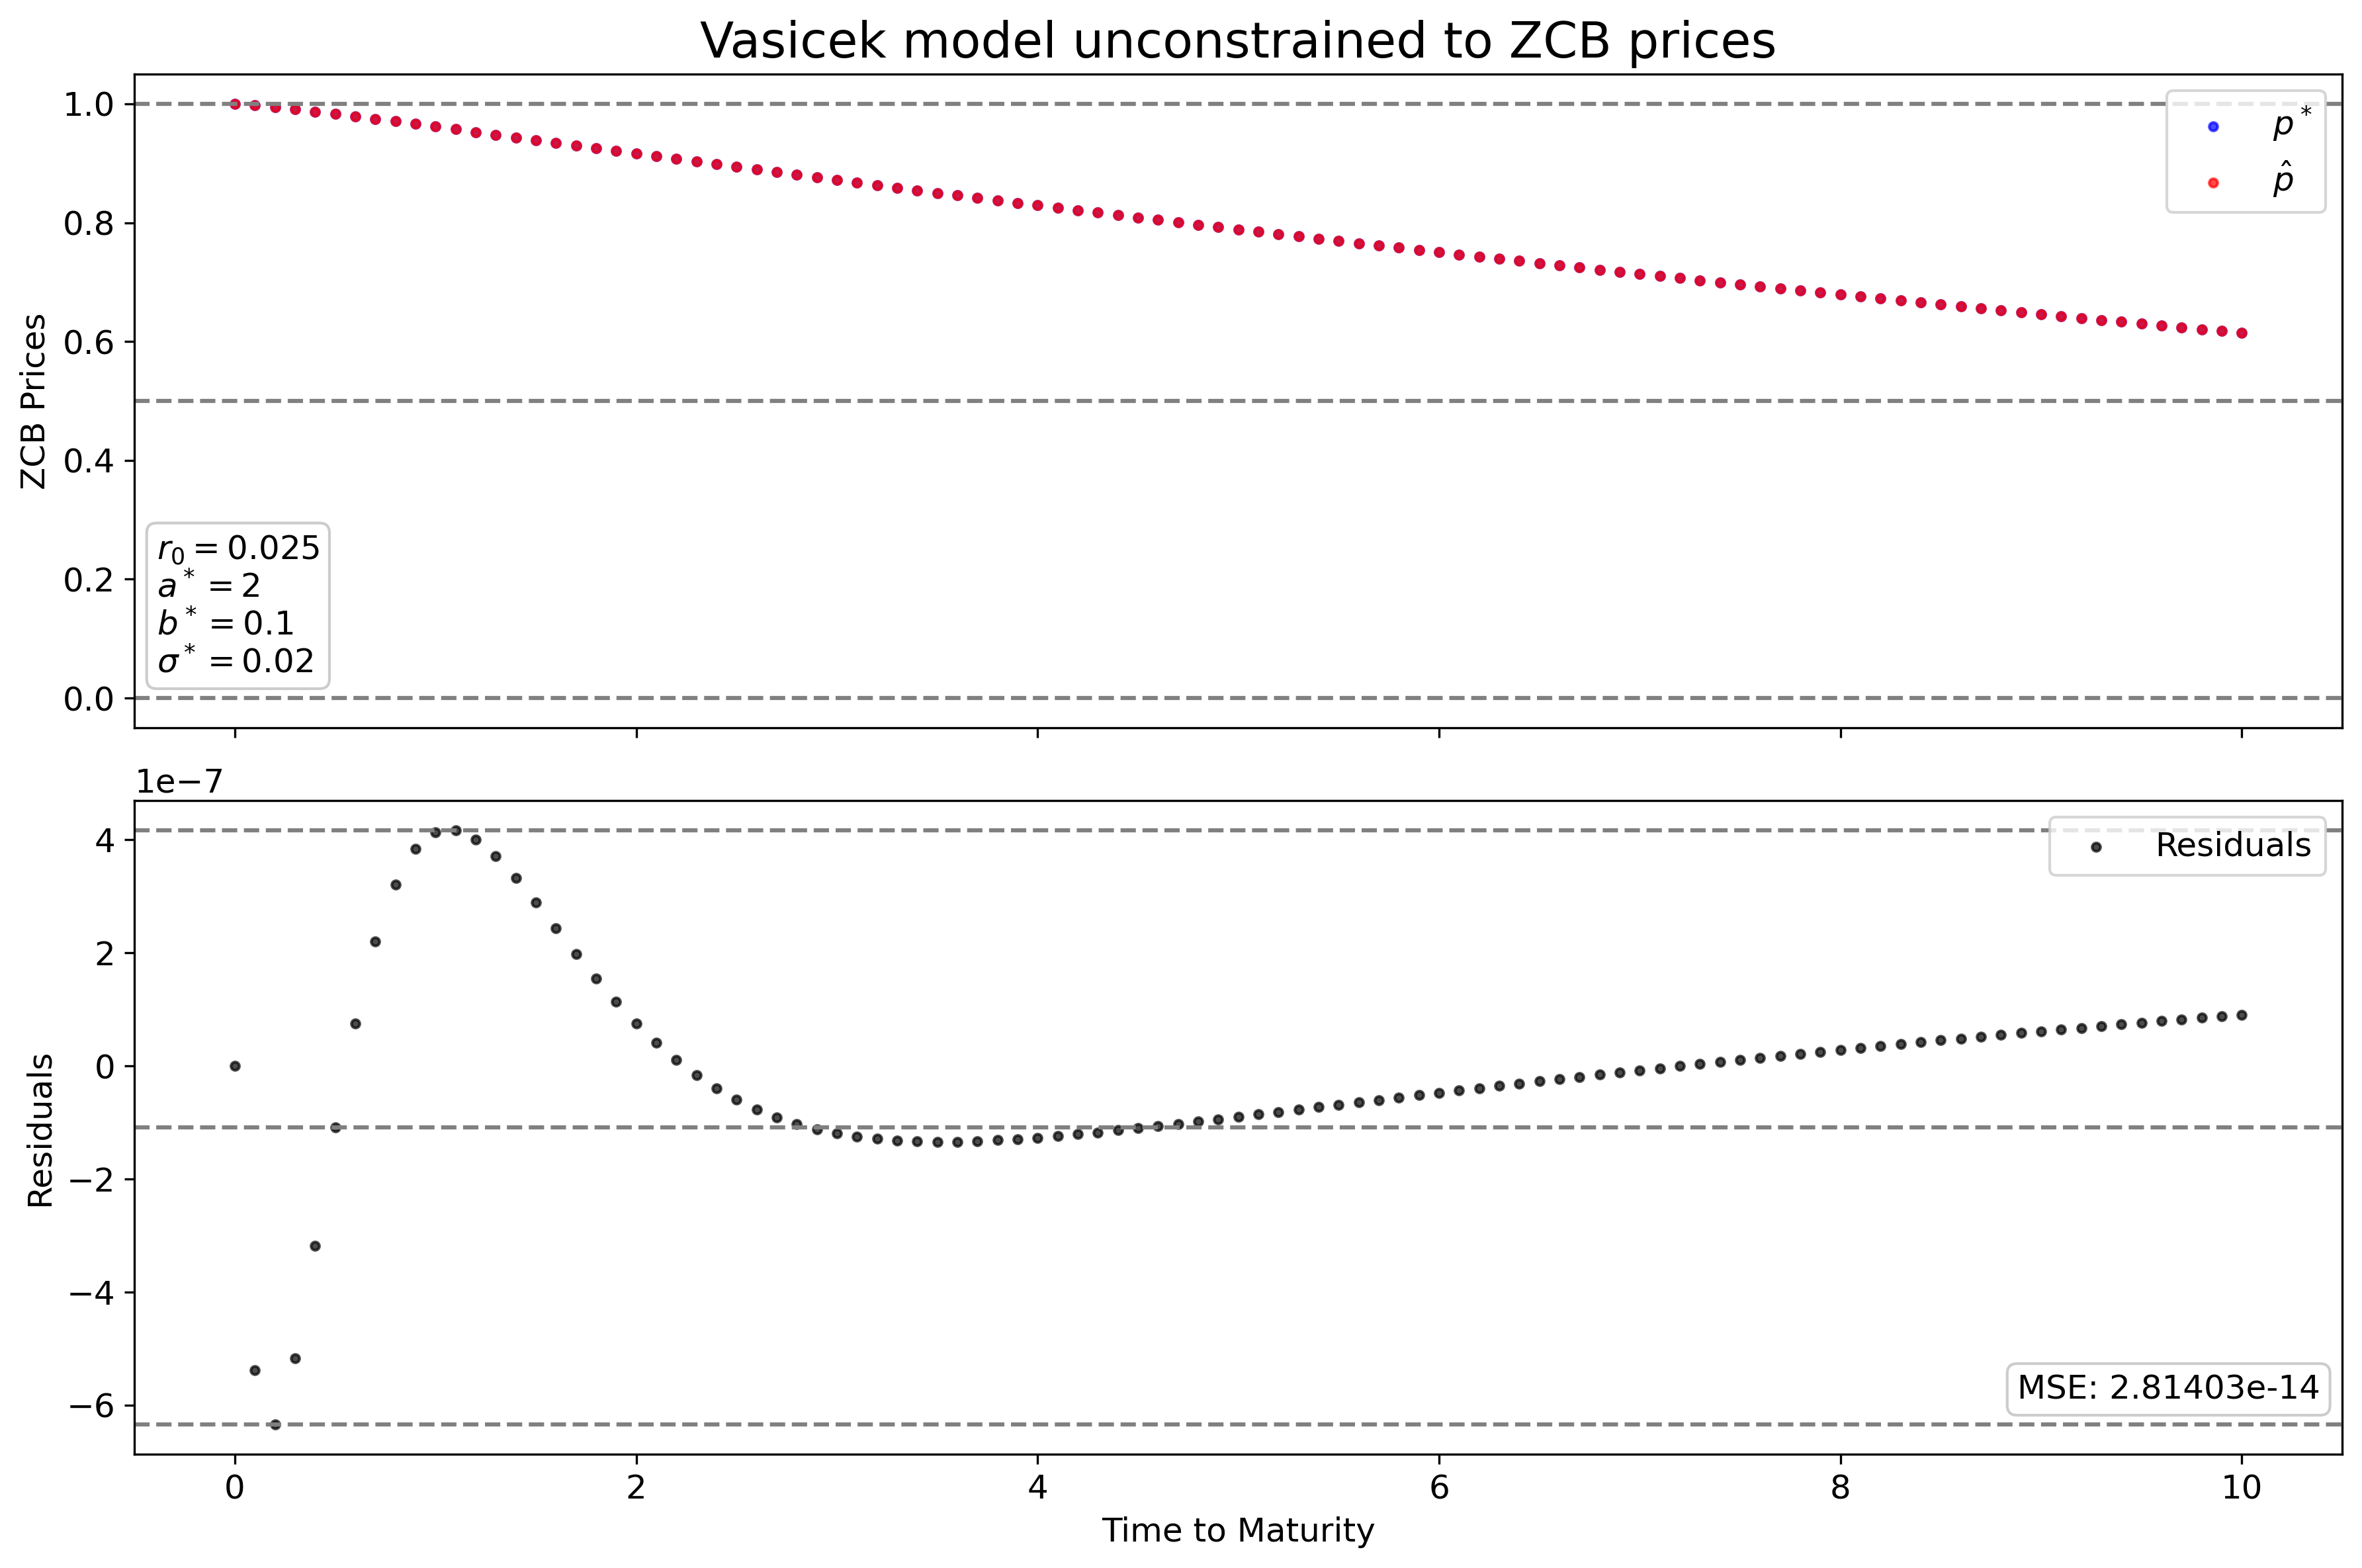

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: ZCB Prices
ax[0].scatter(T, p_star_vasicek, label='$p^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, p_fit, label='$\hat{p}$', marker='.', color='red', alpha=0.7)
for i in range(0, 3):
    ax[0].axhline(y=i*0.5, color='gray', linestyle='--')
ax[0].set_ylabel('ZCB Prices', fontsize=12)
ax[0].set_title('Vasicek model unconstrained to ZCB prices', fontsize=18)

ax[0].legend(fontsize=12)
textstr = f'$r_0={r0}$\n$a^*={a}$\n$b^*={b}$\n$\\sigma^*={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.01, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)
# Calculate dynamic limits
y_min = min(res)
y_max = max(res)
y_range = y_max - y_min

# Set the y-axis limits with some padding
padding = 0.05 * y_range  # Adjust padding as needed
ax[1].set_ylim([y_min - padding, y_max + padding])

# Create horizontal lines dynamically based on the range
num_lines = 3  # Number of horizontal lines
step = y_range / (num_lines - 1)  # Spacing between lines
for i in range(num_lines):
    ax[1].axhline(y=y_min + i * step, color='gray', linestyle='--')
ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12)

# calculate the mse of the residuals
mse = np.mean(res**2)
txt_mse = f'MSE: {mse:.5e}'
ax[1].text(0.99, 0.075, txt_mse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


plt.tight_layout()
plt.show()
plt.close()

#### (b) Use the function ’minimize’ and the method ’nelder-mead’ to fit a Vasicek model to the prices $p^*(0,T)$ that you just generated. Do so by minimizing the sum of squared errors as a function of $r$, $a$, $b$, $\sigma$ and setting the starting values of the parameters in the algorithm to $r_0 = 0.03$, $a_0 = 1.8$, ,$b_0= 0.12$ $\sigma_0 = 0.03$. Plot the fitted values $\hat{p}(0,T)$ and the empirical values $p^*(0,T)$. Are the fitted and empirical values close? Also plot the residuals of your fit and find the mean squared error

#### (c) Try to change the starting values of the parameters and perform the fit again. Which of the four parameters are best recovered by your fit and what does that tell you about the objective function as a function of $r$, $a$, $b$, and $\sigma$?

In [10]:
params = [(0.03, 1.8, 0.12, 0.03),(0.02, 2.2, 0.08, 0.01),(-0.02, 1.0, 0.01, 0.01)]
for param in params:
    print(f'Initial parameters: {param}')
    result = minimize(vasicek_zcb_obj,param,method = 'nelder-mead',args = (p_star_vasicek,T),options={'xatol': 1e-8,'disp': False})
    r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.x
    print("results:\n",
      f"r0_hat:     {r0_hat:5f} (true: {r0})\n", 
      f"a_hat:      {a_hat:5f} (true: {a})\n", 
      f"b_hat:      {b_hat:5f} (true: {b})\n", 
      f"sigma_hat:  {sigma_hat:5f} (true: {sigma})\n")

Initial parameters: (0.03, 1.8, 0.12, 0.03)
results:
 r0_hat:     0.024991 (true: 0.025)
 a_hat:      1.998770 (true: 2)
 b_hat:      0.100032 (true: 0.1)
 sigma_hat:  0.027786 (true: 0.02)

Initial parameters: (0.02, 2.2, 0.08, 0.01)
results:
 r0_hat:     0.025007 (true: 0.025)
 a_hat:      2.000939 (true: 2)
 b_hat:      0.099973 (true: 0.1)
 sigma_hat:  0.010318 (true: 0.02)

Initial parameters: (-0.02, 1.0, 0.01, 0.01)
results:
 r0_hat:     0.025010 (true: 0.025)
 a_hat:      2.001251 (true: 2)
 b_hat:      0.099965 (true: 0.1)
 sigma_hat:  0.002938 (true: 0.02)



Changing the initial values of the parameters, we can see that the algorithm tends to recover the true parameters of the model as long as the initial parameters are not too far from the true values and in particular, that the initial values for $a$ and $b$ are of the right sign (positive). As for $\sigma$, it is quite clear that the algorithm is not able to recover the true value of σ but the model fits ZCB prices nonetheless. This reveals that ZCB prices in the Vasicek model are not affected very much by $\sigma$ and when fitting the model to market data in practice, it is probably best to estimate $\sigma$ from other sources

#### (d) Now redo the fit but impose that $b = 0.12$. Do this by changing the objective function in your fit so that it only optimizes over $r$, $a$ and $\sigma$. Reproduce the plots from above and investigate the fit you now get.

In [11]:
# create a fitting function
def vasicek_zcb_obj_b(param,p_star,b,T):
    r0, a, sigma = param
    N = len(p_star)
    p_fit = fid.zcb_price_vasicek(r0,a,b,sigma,T)
    y = 0
    for i in range(0,N):
        y += 1e16*(p_fit[i] - p_star[i])**2
    return y

In [12]:
params0 = (0.03, 1.8, 0.03)
b_hat = 0.12
result = minimize(vasicek_zcb_obj_b,params0,method = 'nelder-mead',args = (p_star_vasicek,b_hat,T),options={'xatol': 1e-8,'disp': False})
r0_hat, a_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x
print("results:\n",
      f"r0_hat:     {r0_hat:5f} (true: {r0})\n", 
      f"a_hat:      {a_hat:5f} (true: {a})\n", 
      f"sigma_hat:  {sigma_hat:5f} (true: {sigma})\n")
p_fit = fid.zcb_price_vasicek(r0_hat,a_hat,b_hat,sigma_hat,T)
res = p_star_vasicek - p_fit

results:
 r0_hat:     0.020903 (true: 0.025)
 a_hat:      2.303683 (true: 2)
 sigma_hat:  0.152608 (true: 0.02)



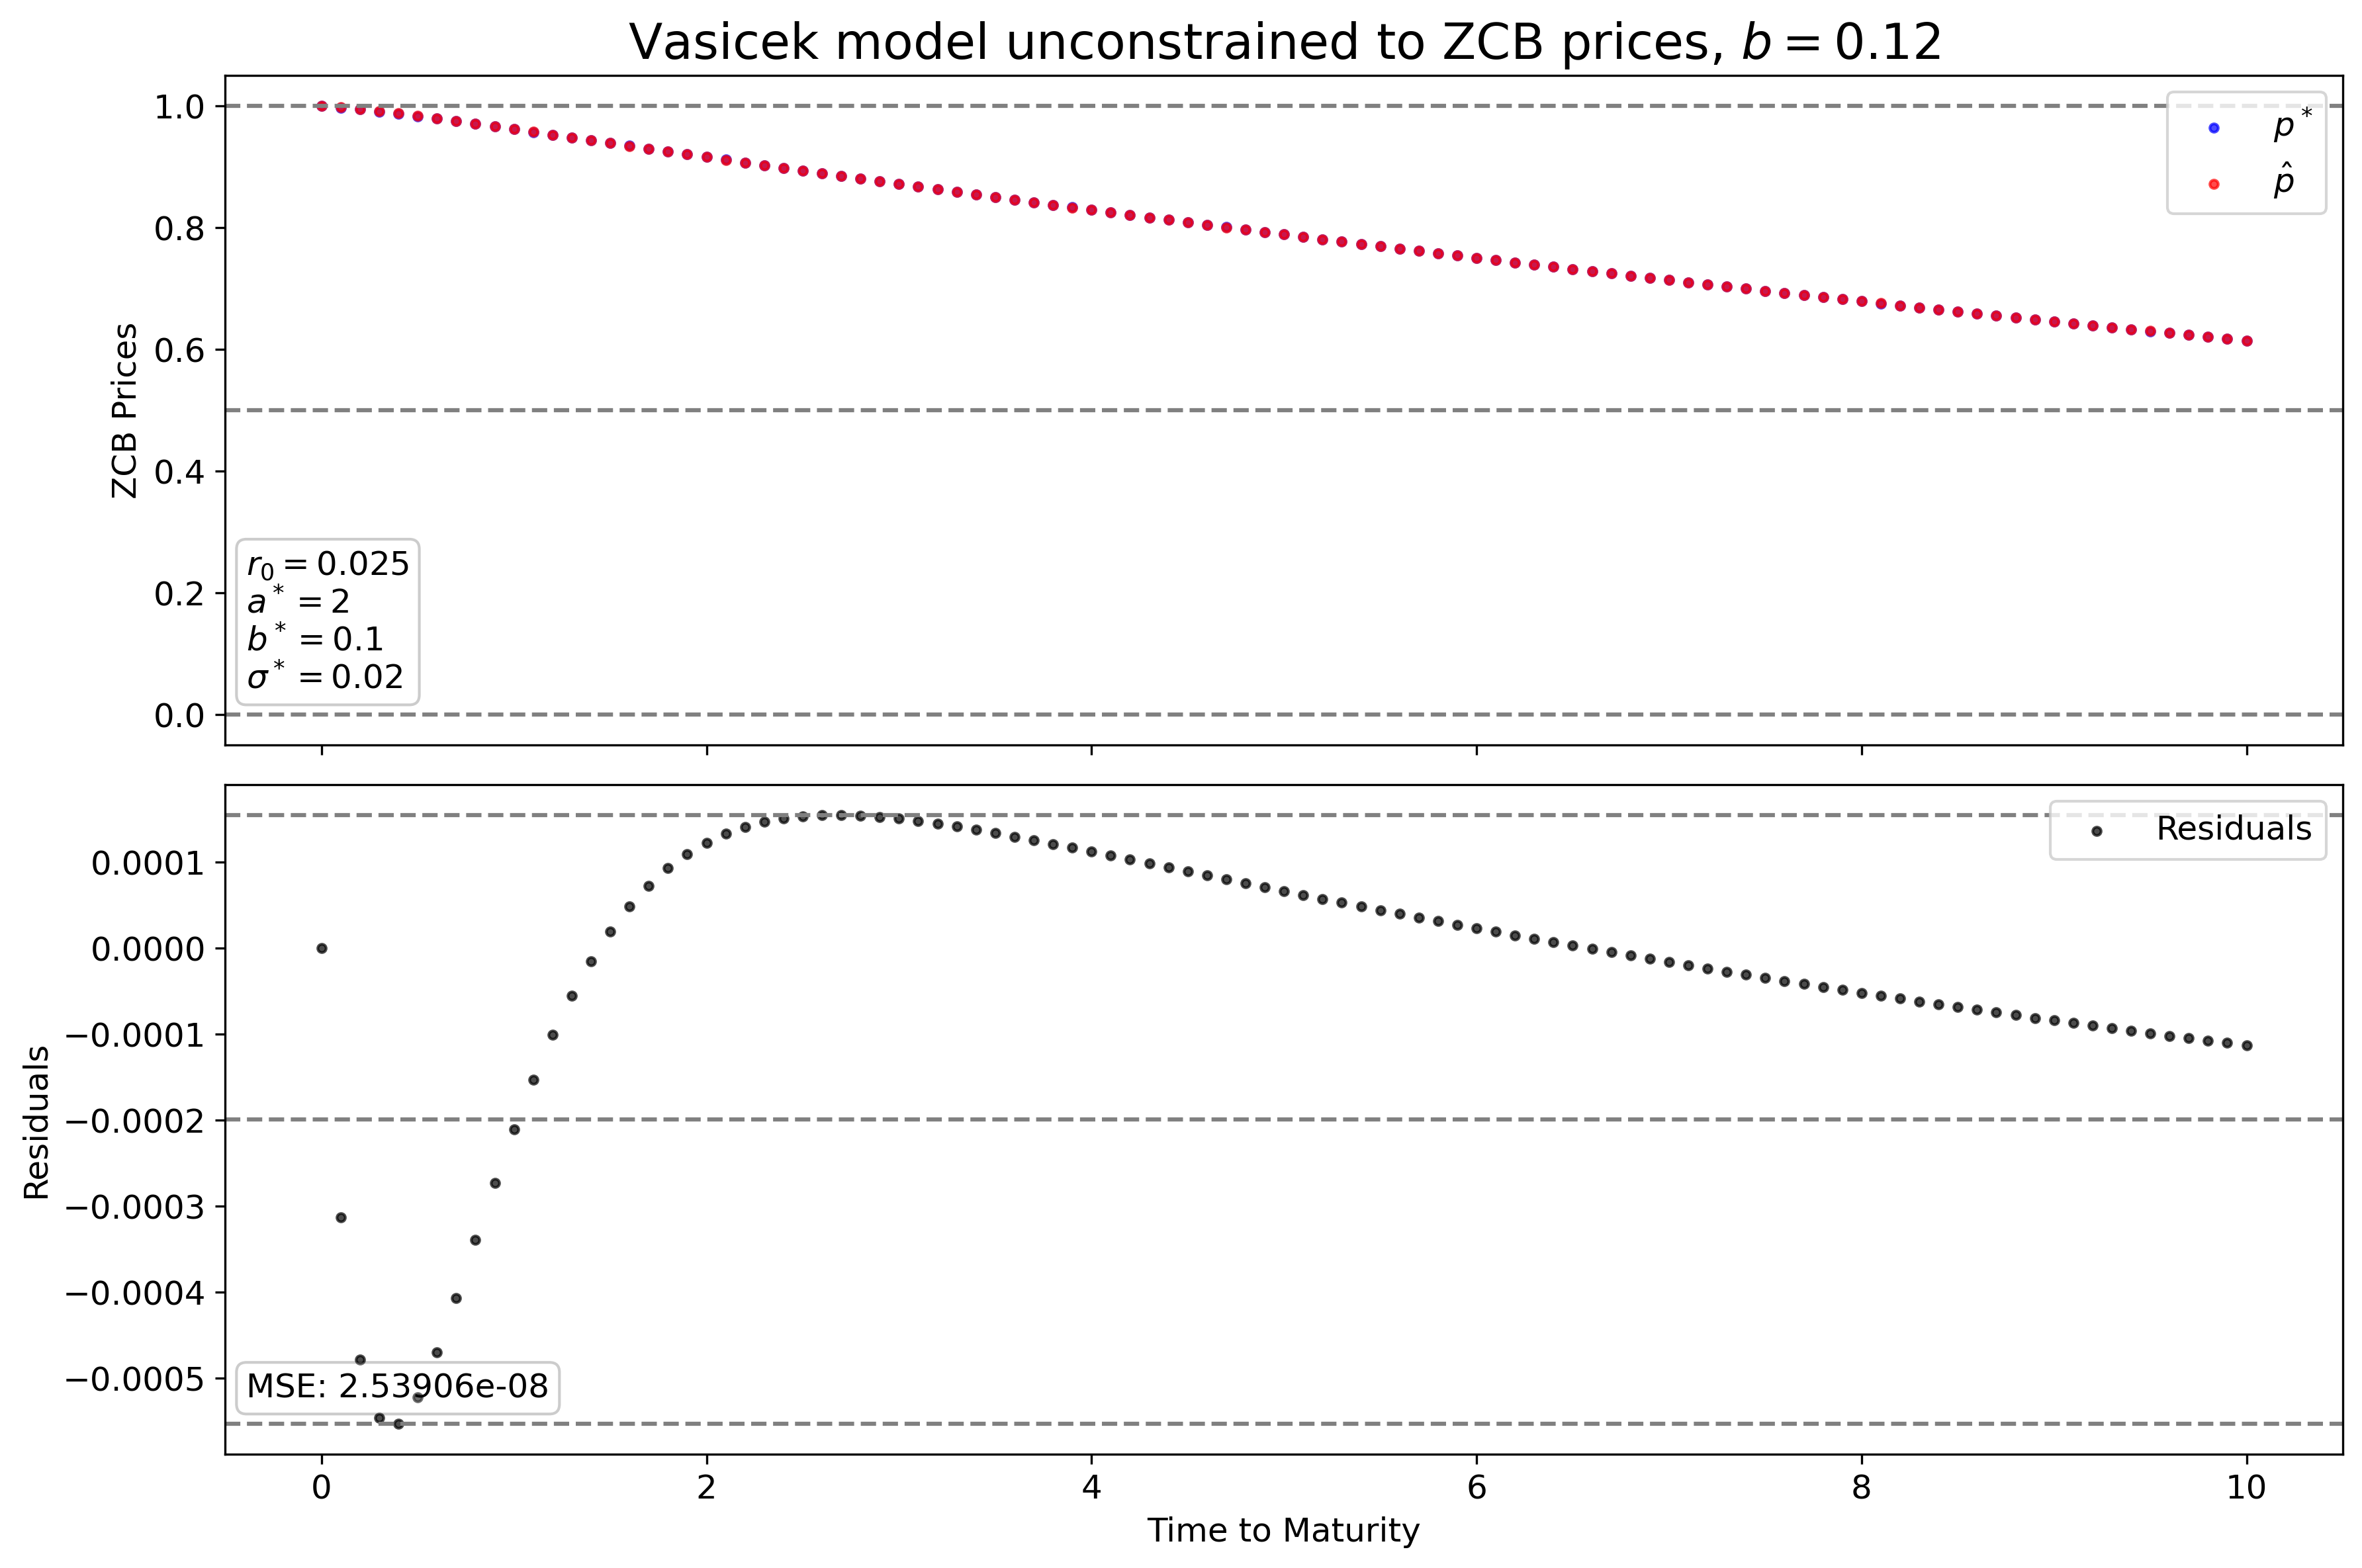

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: ZCB Prices
ax[0].scatter(T, p_star_vasicek, label='$p^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, p_fit, label='$\hat{p}$', marker='.', color='red', alpha=0.7)
for i in range(0, 3):
    ax[0].axhline(y=i*0.5, color='gray', linestyle='--')
ax[0].set_ylabel('ZCB Prices', fontsize=12)
ax[0].legend(fontsize=12)
textstr = f'$r_0={r0}$\n$a^*={a}$\n$b^*={b}$\n$\\sigma^*={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.01, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)
# Calculate dynamic limits
y_min = min(res)
y_max = max(res)
y_range = y_max - y_min

# Set the y-axis limits with some padding
padding = 0.05 * y_range  # Adjust padding as needed
ax[1].set_ylim([y_min - padding, y_max + padding])

# Create horizontal lines dynamically based on the range
num_lines = 3  # Number of horizontal lines
step = y_range / (num_lines - 1)  # Spacing between lines
for i in range(num_lines):
    ax[1].axhline(y=y_min + i * step, color='gray', linestyle='--')
ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12)

# calculate the mse of the residuals
mse = np.mean(res**2)
txt_mse = f'MSE: {mse:.5e}'
ax[1].text(0.01, 0.075, txt_mse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'left', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title('Vasicek model unconstrained to ZCB prices, $b=0.12$', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()

#### (e) Impose the bounds that $0\leq r \leq 0.1$, $0 \leq a \leq 10$, $0 \leq b \leq 0.2$ and $0 \leq \sigma \leq 0.1$ and perform the fit. Check once again that you recover the true parameters

In [22]:
# define initial values and bounds for the parameters: (r0, a, b, sigma)
params0 = (0.03, 1.8, 0.12, 0.03)
bounds = [
    (1e-9, 0.1),   # Bounds for r0
    (1e-9, 10.0),   # Bounds for a
    (1e-9, 0.2),   # Bounds for b
    (1e-9, 0.1)   # Bounds for sigma
] # setting bound to start a practically 0 to avoid division by zero

# optimize using L-BFGS-B
result = minimize(vasicek_zcb_obj, params0, method='L-BFGS-B', bounds=bounds, args=(p_star_vasicek, T), options={'ftol': 1e-8, 'disp': False})

# extract results
r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.fun

print("results:\n",
      f"r0_hat:     {r0_hat:5f} (true: {r0})\n", 
      f"a_hat:      {a_hat:5f} (true: {a})\n", 
      f"b_hat:      {b_hat:5f} (true: {b})\n", 
      f"sigma_hat:  {sigma_hat:5f} (true: {sigma})\n")

# calculate fitted prices and residuals
p_fit = fid.zcb_price_vasicek(r0_hat, a_hat, b_hat, sigma_hat, T)
res = p_star_vasicek - p_fit


results:
 r0_hat:     0.025016 (true: 0.025)
 a_hat:      1.995022 (true: 2)
 b_hat:      0.099903 (true: 0.1)
 sigma_hat:  0.031613 (true: 0.02)



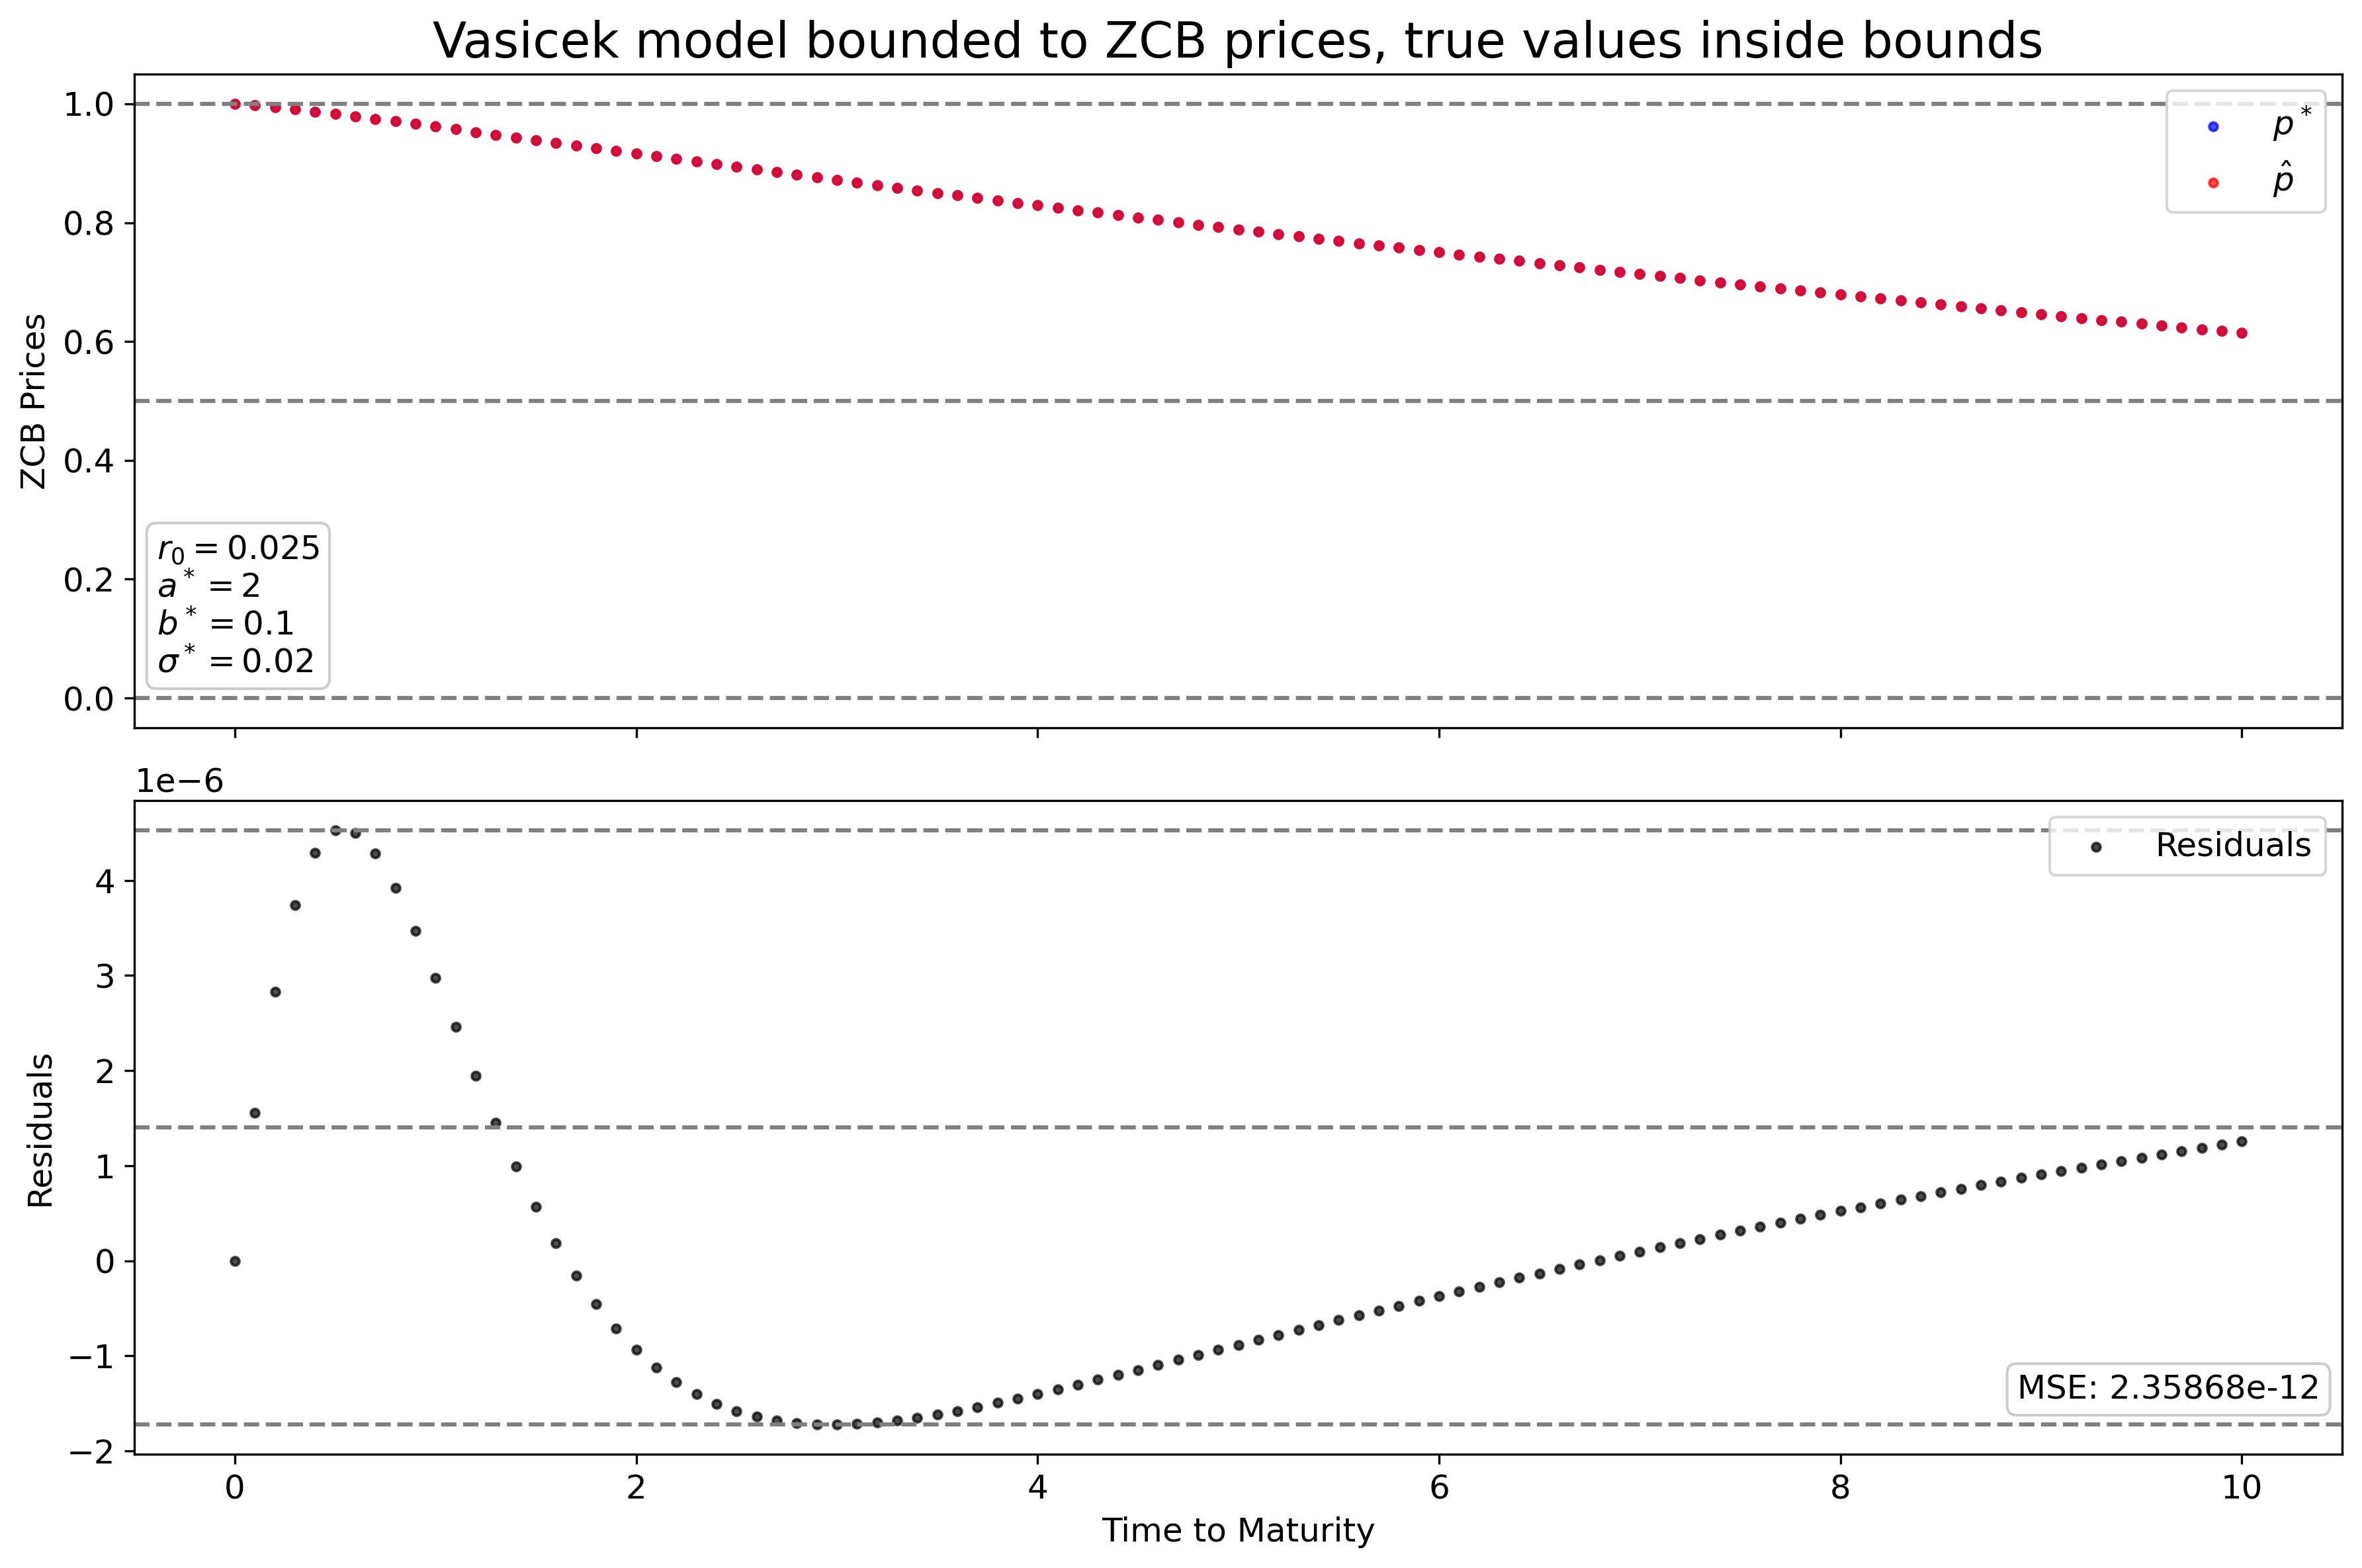

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: ZCB Prices
ax[0].scatter(T, p_star_vasicek, label='$p^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, p_fit, label='$\hat{p}$', marker='.', color='red', alpha=0.7)
for i in range(0, 3):
    ax[0].axhline(y=i*0.5, color='gray', linestyle='--')
ax[0].set_ylabel('ZCB Prices', fontsize=12)
ax[0].legend(fontsize=12)
textstr = f'$r_0={r0}$\n$a^*={a}$\n$b^*={b}$\n$\\sigma^*={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.01, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)
# Calculate dynamic limits
y_min = min(res)
y_max = max(res)
y_range = y_max - y_min

# Set the y-axis limits with some padding
padding = 0.05 * y_range  # Adjust padding as needed
ax[1].set_ylim([y_min - padding, y_max + padding])

# Create horizontal lines dynamically based on the range
num_lines = 3  # Number of horizontal lines
step = y_range / (num_lines - 1)  # Spacing between lines
for i in range(num_lines):
    ax[1].axhline(y=y_min + i * step, color='gray', linestyle='--')
ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12)

# calculate the mse of the residuals
mse = np.mean(res**2)
txt_mse = f'MSE: {mse:.5e}'
ax[1].text(0.99, 0.075, txt_mse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title('Vasicek model bounded to ZCB prices, true values inside bounds', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()

When doing a bounded fit but setting the bounds such that the true parameter values are inside the bounds, the algorithm does indeed recover the true parameter values and results in a near perfect fit as illustrated

#### (f) Now impose the restrictions that $0 \leq r \leq 0.1$, $0 \leq a \leq 1$, $0 \leq b \leq 0.08$ and $0 \leq \sigma \leq 0.1$ and perform the fit again. The true parameters are now outside the parameter space of the fit. Where do your fitted parameters now lie and was that to be expected?

In [27]:
# define initial values and bounds for the parameters: (r0, a, b, sigma)
params0 = (0.03, 1.8, 0.12, 0.03)
bounds = [
    (1e-9, 0.1),   # Bounds for r0
    (1e-9, 1.0),   # Bounds for a
    (1e-9, 0.08),   # Bounds for b
    (1e-9, 0.1)   # Bounds for sigma
] # setting bound to start a practically 0 to avoid division by zero

# optimize using L-BFGS-B
result = minimize(vasicek_zcb_obj, params0, method='L-BFGS-B', bounds=bounds, args=(p_star_vasicek, T), options={'ftol': 1e-8, 'disp': False})

# extract results
r0_hat, a_hat, b_hat, sigma_hat, fct_value = result.x[0], result.x[1], result.x[2], result.x[3], result.fun

print("results:\n",
      f"r0_hat:     {r0_hat:5f} (true: {r0})\n", 
      f"a_hat:      {a_hat:5f} (true: {a})\n", 
      f"b_hat:      {b_hat:5f} (true: {b})\n", 
      f"sigma_hat:  {sigma_hat:5f} (true: {sigma})\n")

# calculate fitted prices and residuals
p_fit = fid.zcb_price_vasicek(r0_hat, a_hat, b_hat, sigma_hat, T)
res = p_star_vasicek - p_fit


results:
 r0_hat:     0.033251 (true: 0.025)
 a_hat:      1.000000 (true: 2)
 b_hat:      0.055234 (true: 0.1)
 sigma_hat:  0.100000 (true: 0.02)



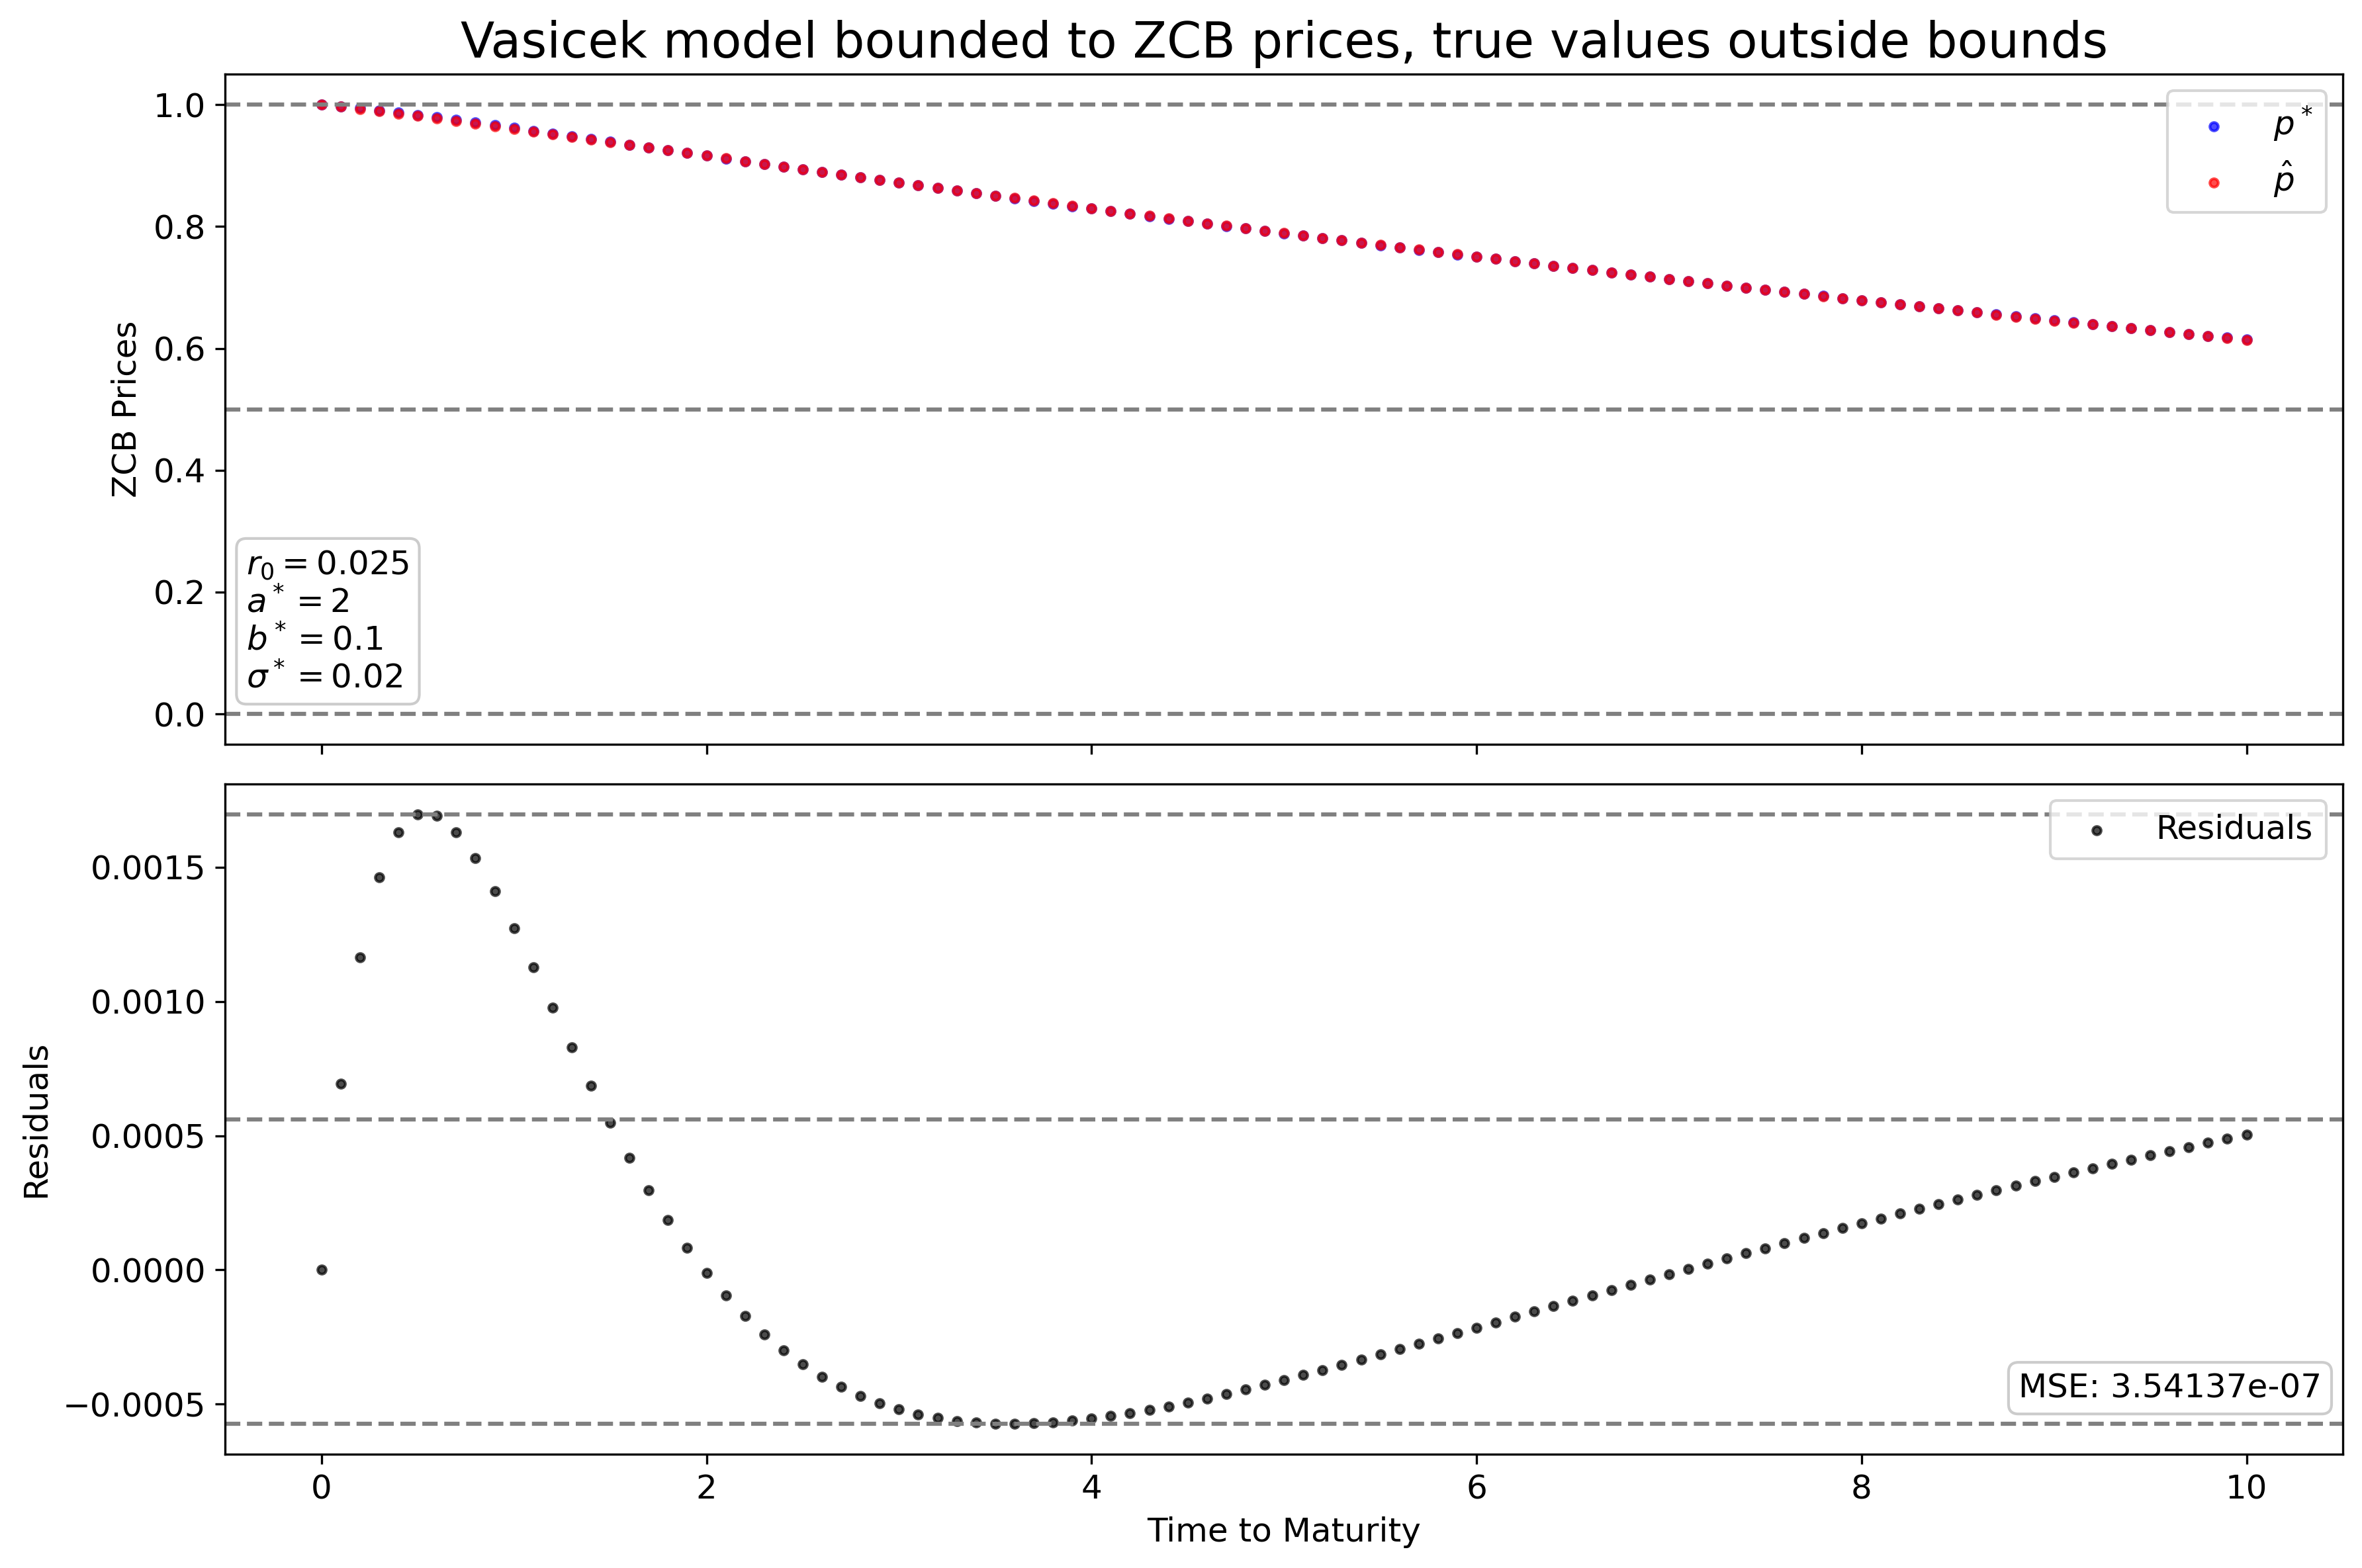

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: ZCB Prices
ax[0].scatter(T, p_star_vasicek, label='$p^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, p_fit, label='$\hat{p}$', marker='.', color='red', alpha=0.7)
for i in range(0, 3):
    ax[0].axhline(y=i*0.5, color='gray', linestyle='--')
ax[0].set_ylabel('ZCB Prices', fontsize=12)
ax[0].legend(fontsize=12)
textstr = f'$r_0={r0}$\n$a^*={a}$\n$b^*={b}$\n$\\sigma^*={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.01, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)
# Calculate dynamic limits
y_min = min(res)
y_max = max(res)
y_range = y_max - y_min

# Set the y-axis limits with some padding
padding = 0.05 * y_range  # Adjust padding as needed
ax[1].set_ylim([y_min - padding, y_max + padding])

# Create horizontal lines dynamically based on the range
num_lines = 3  # Number of horizontal lines
step = y_range / (num_lines - 1)  # Spacing between lines
for i in range(num_lines):
    ax[1].axhline(y=y_min + i * step, color='gray', linestyle='--')
ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12)

# calculate the mse of the residuals
mse = np.mean(res**2)
txt_mse = f'MSE: {mse:.5e}'
ax[1].text(0.99, 0.075, txt_mse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title('Vasicek model bounded to ZCB prices, true values outside bounds', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()

Imposing bounds such that the true parameter values are outside the bounds reduces the quality of the fit, but also in the case of these bounds the algorithm is able to compensate and produce a fairly solid fit of ZCB prices.

#### (g) Now, set the bounds back to the initial values $0 \leq r \leq 0.1$, 0 \leq a \leq 10$, $0 \leq b \leq 0.2$ and $0 \leq \sigma \leq 0.2$ but impose the non-linear constraint that $2ab \geq \sigma^2$ also using the ’trust-constr’ method

In [29]:
# define the non-linear constraint: 2ab - sigma^2 >= 0
def constraint(params):
    r0, a, b, sigma = params
    return 2 * a * b - sigma**2

In [42]:
# initial parameters and bounds
params0 = (0.03, 1.8, 0.12, 0.03)
bounds = Bounds(
    [0.0, 0.0, 0.0, 0.0],  # Lower bounds
    [1.0, 10.0, 0.2, 0.1]    # Upper bounds
)

# Define the NonlinearConstraint object
nonlinear_constraint = NonlinearConstraint(
    fun=constraint,
    lb=0,  # Lower bound (g(x) >= 0)
    ub=np.inf  # Upper bound (no upper limit)
)

# optimization with trust-constr
result = minimize(vasicek_zcb_obj, params0, method='trust-constr', bounds=bounds, constraints=[nonlinear_constraint], args=(p_star_vasicek, T), options={'disp':False})

# results
r0_hat, a_hat, b_hat, sigma_hat = result.x
print("results:\n",
      f"r0_hat:     {r0_hat:5f} (true: {r0})\n", 
      f"a_hat:      {a_hat:5f} (true: {a})\n", 
      f"b_hat:      {b_hat:5f} (true: {b})\n", 
      f"sigma_hat:  {sigma_hat:5f} (true: {sigma})\n")

# calculate fitted prices and residuals
p_fit = fid.zcb_price_vasicek(r0_hat, a_hat, b_hat, sigma_hat, T)
res = p_star_vasicek - p_fit


results:
 r0_hat:     0.025028 (true: 0.025)
 a_hat:      1.992469 (true: 2)
 b_hat:      0.099839 (true: 0.1)
 sigma_hat:  0.035312 (true: 0.02)



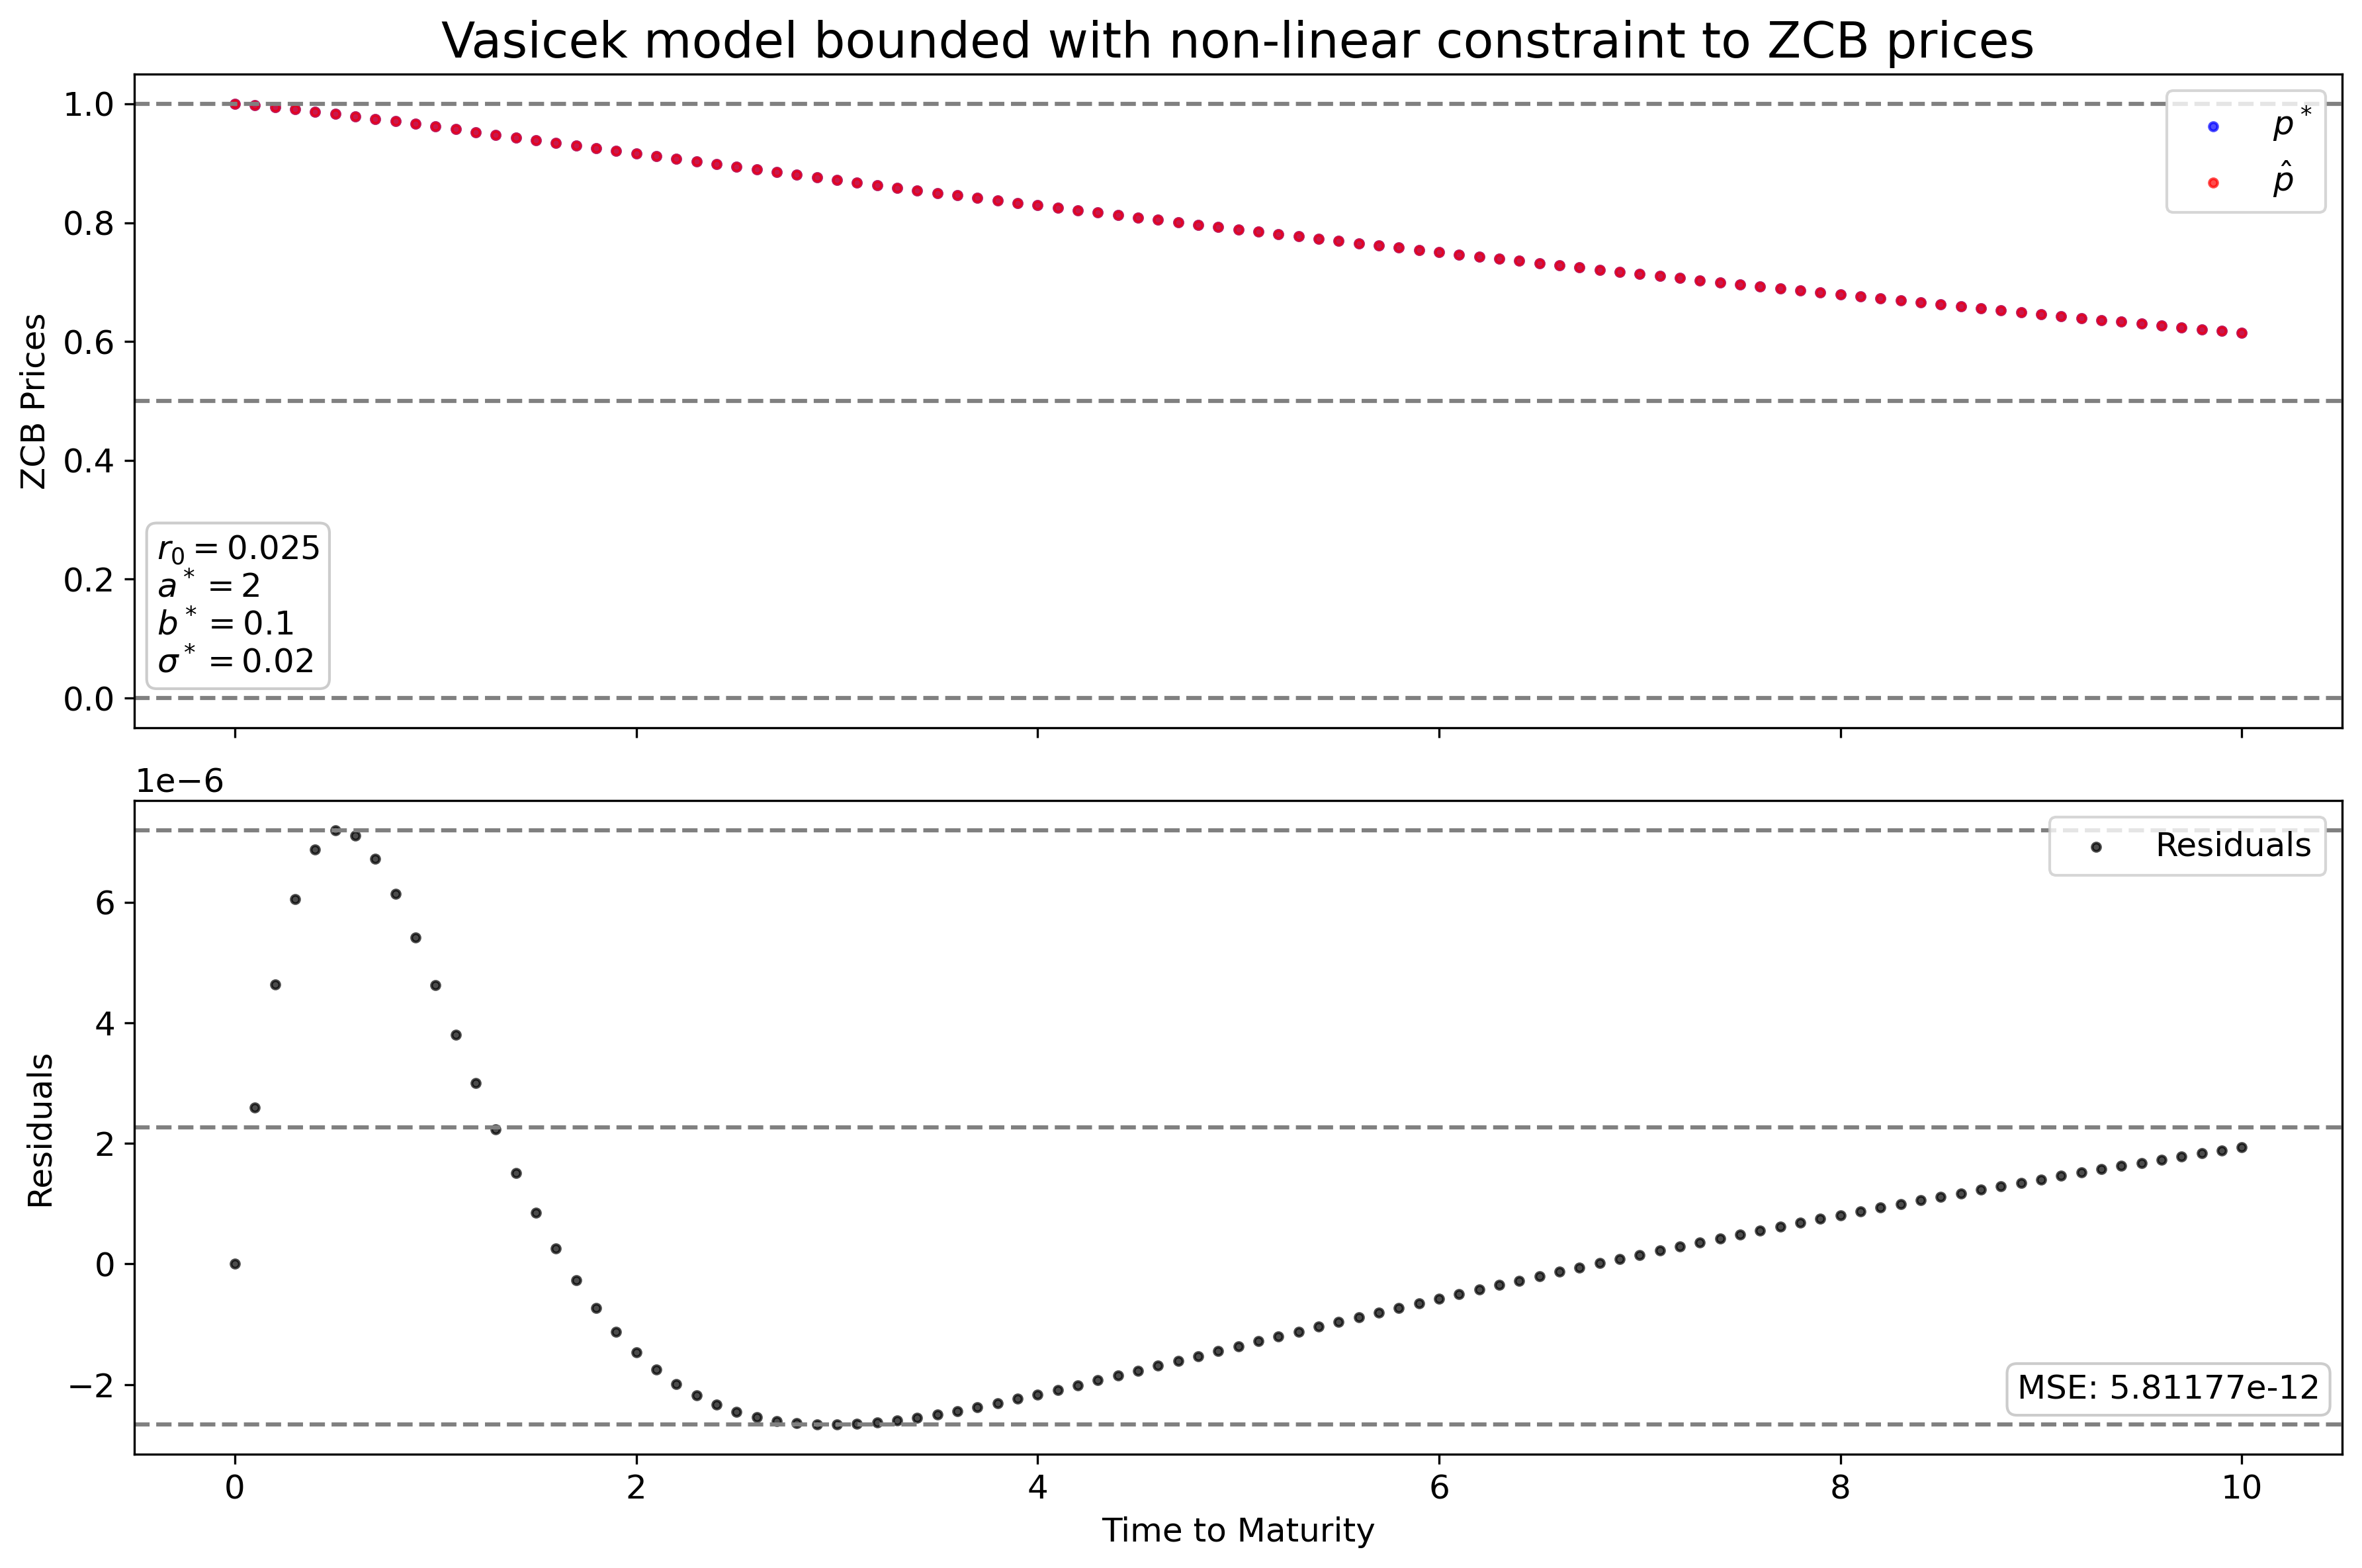

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, sharex=True)

# First subplot: ZCB Prices
ax[0].scatter(T, p_star_vasicek, label='$p^*$', marker='.', color='blue', alpha=0.7)
ax[0].scatter(T, p_fit, label='$\hat{p}$', marker='.', color='red', alpha=0.7)
for i in range(0, 3):
    ax[0].axhline(y=i*0.5, color='gray', linestyle='--')
ax[0].set_ylabel('ZCB Prices', fontsize=12)
ax[0].legend(fontsize=12)
textstr = f'$r_0={r0}$\n$a^*={a}$\n$b^*={b}$\n$\\sigma^*={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
ax[0].text(0.01, 0.075, textstr, transform=ax[0].transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

# Second subplot: Residuals
ax[1].scatter(T, res, label='Residuals', marker='.', color='black', alpha=0.7)
ax[1].set_ylabel('Residuals', fontsize=12)
# Calculate dynamic limits
y_min = min(res)
y_max = max(res)
y_range = y_max - y_min

# Set the y-axis limits with some padding
padding = 0.05 * y_range  # Adjust padding as needed
ax[1].set_ylim([y_min - padding, y_max + padding])

# Create horizontal lines dynamically based on the range
num_lines = 3  # Number of horizontal lines
step = y_range / (num_lines - 1)  # Spacing between lines
for i in range(num_lines):
    ax[1].axhline(y=y_min + i * step, color='gray', linestyle='--')
ax[1].set_xlabel('Time to Maturity', fontsize=12)
ax[1].legend(fontsize=12)

# calculate the mse of the residuals
mse = np.mean(res**2)
txt_mse = f'MSE: {mse:.5e}'
ax[1].text(0.99, 0.075, txt_mse, transform=ax[1].transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment = 'right', bbox=props)

for ax_i in ax:
    ax_i.tick_params(axis='both', which='major', labelsize=12)
    ax_i.yaxis.get_offset_text().set_fontsize(12)  # Adjust the size as needed


ax[0].set_title('Vasicek model bounded with non-linear constraint to ZCB prices', fontsize=18)
plt.tight_layout()
plt.show()
plt.close()